In [1]:
from PIL import Image
import cv2
import numpy as np
import urllib.request

In [2]:
img_url = "https://a57.foxnews.com/media.foxbusiness.com/BrightCove/854081161001/201805/2879/931/524/854081161001_5782482890001_5782477388001-vs.jpg"
urllib.request.urlretrieve(img_url, "Traffic.jpg")

('Traffic.jpg', <http.client.HTTPMessage at 0x7fd5f0808130>)

In [3]:
image = cv2.imread("/content/Traffic.jpg")
image_arr = np.array(image)

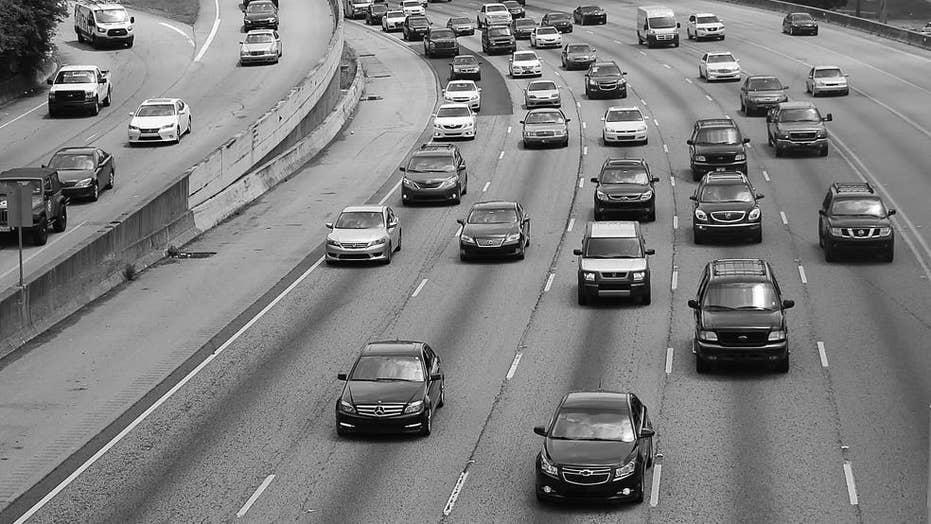

In [4]:
grey = cv2.cvtColor(image_arr, cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

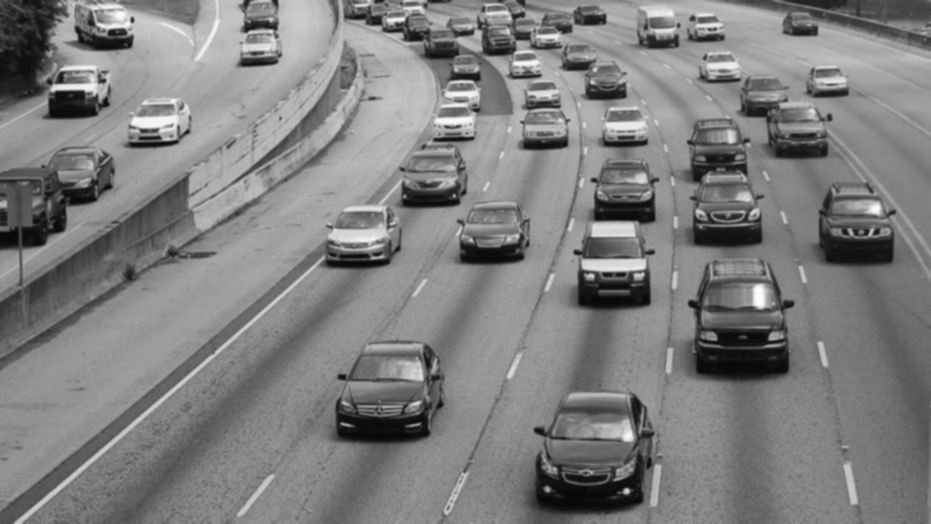

In [5]:
blur = cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)

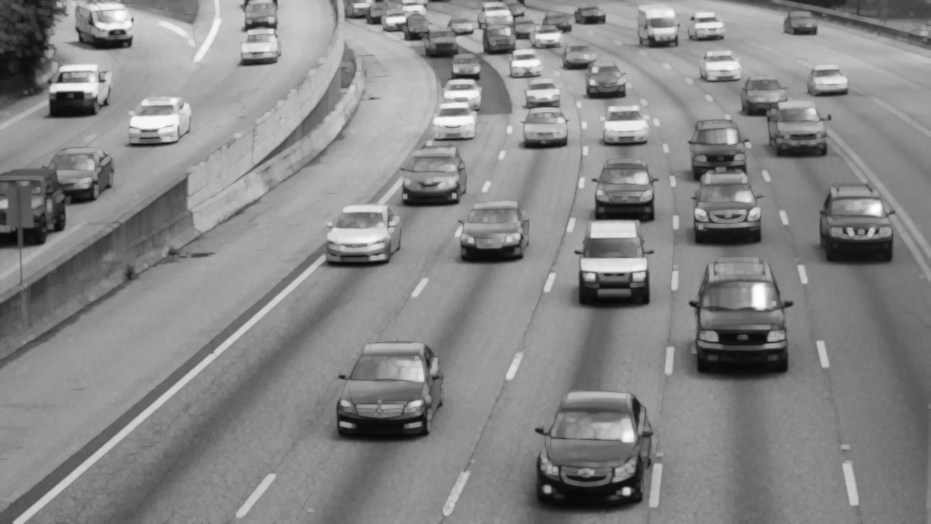

In [6]:
dilated = cv2.dilate(blur,np.ones((3,3)))
Image.fromarray(dilated)

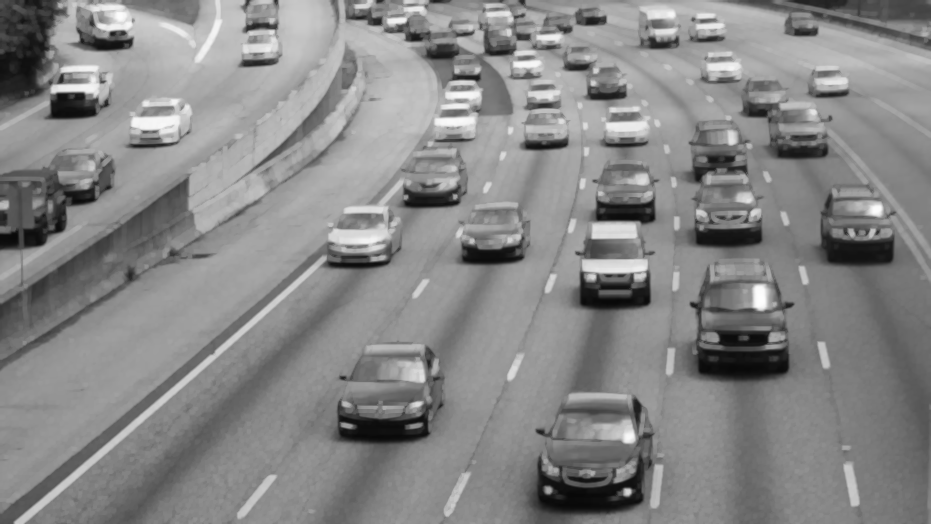

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel) 
Image.fromarray(closing)

In [8]:
car_cascade_src = '/content/cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1, 1)

35  cars found


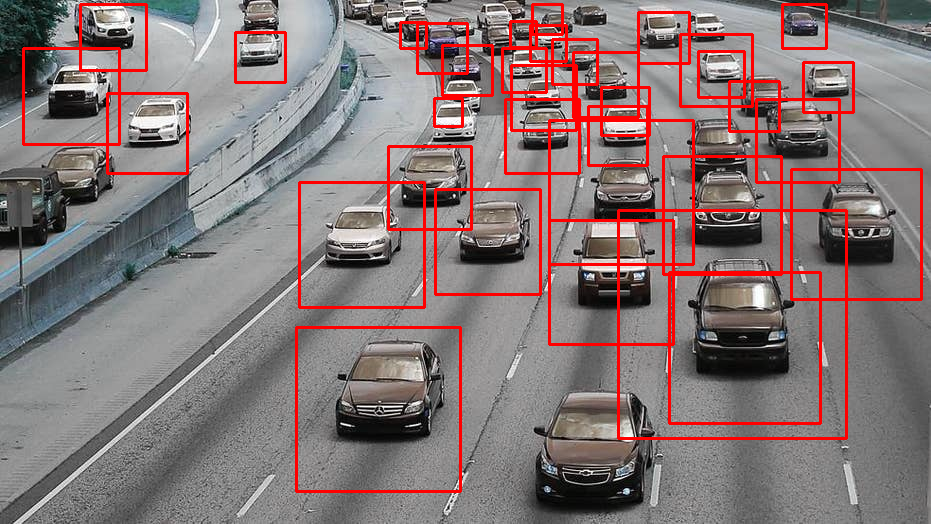

In [9]:
cnt = 0
for (x,y,w,h) in cars:
    cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
    cnt += 1
print(cnt, " cars found")
Image.fromarray(image_arr)